# Assignment 1

## Question `2` (Decision Trees)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

This assignment will have you working and experimenting with decision trees. Initially, you will be required to implement a decision tree classifier by choosing thresholds based on various impurity measures and reporting the scores. Later, you can experiment with the `scikit-learn` implementation of decision trees, and how various other parameters can be leveraged for better performance.

The dataset is a very simple one, the [banknote authentication dataset](https://archive.ics.uci.edu/ml/datasets/banknote+authentication). It has 5 columns, the first 4 are the features, and the last one is the class label. The features are the variance, skewness, curtosis and entropy of the [wavelet transformed](https://en.wikipedia.org/wiki/Wavelet_transform) image of the banknote. The class label is 1 if the banknote is authentic, and 0 if it is forged. The data is present in `bankAuth.txt`. There are a total of 1372 samples in the dataset.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# additional imports if necessary
from math import log2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [2]:
# your code here
df = pd.read_csv('bankAuth.txt', header=None)
df.columns = ['variance', 'skewness', 'curtosis','entropy', 'label']
df

,variance,skewness,curtosis,entropy,label
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
df.describe()

,variance,skewness,curtosis,entropy,label
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   label     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.dropna(inplace = True) # none found
x = df.duplicated() # duplicates found
df.drop_duplicates(inplace = True)
df.shape

(1348, 5)

### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

In [6]:
# your code here

# get X,y for the split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Splitting the data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1078, 4), (270, 4), (1078,), (270,))

### Impurity Measures

Decision trees are only as good as the impurity measure used to choose the best split. In this section, you will be required to implement the following impurity measures and use them to build a decision tree classifier.

1. Gini Index
2. Entropy
3. Misclassification Error
4. Log Loss

Write functions that calculate the impurity measures for a given set of labels. The functions should take in a list of labels and return the impurity measure.

#### Gini Index

In [7]:
# your code here
def gini_index(y):
    val = 0.0
    labels = np.unique(y)
        
    for i in labels:
        pr = np.sum(y==i)
        pr /= len(y)
        val += pr**2
        
    return (1.0 - val)

#### Entropy

In [8]:
def entropy(y):
    val = 0.0
    labels = np.unique(y)
        
    for i in labels:
        pr = np.sum(y==i)
        pr /= len(y)
        x = log2(pr)
        val += -pr * x
        
    return val

#### Misclasiification error

In [9]:
def misclassification_error(y):
    labels = np.unique(y)
        
    for ind, i in enumerate(labels):
        pr = np.sum(y==i)
        pr /= len(y)
        lables[ind] = pr
    return min(labels)

#### log loss

In [10]:
def log_loss(y):
    return entropy(y)

### Decision Tree

Fit a decision tree using any one of the above impurity measures with a depth of 3. This means you will have eight leaf nodes and seven internal nodes. Report the threshold values at each internal node and the impurity measure at the final leaf node with the label. Also report the accuracy of the classifier on the training and test data (instructions for splitting the data will be given in the end).

In [11]:
# your code here
class Node():
    def __init__(self, ft_index = None, threshold = None, left = None, right = None, entropy = None, info_gain = None, value = None):
        self.ft_index = ft_index
        self.threshold = threshold
        self.info_gain = info_gain
        self.entropy = entropy
        self.value = value
        self.left = left
        self.right = right

In [12]:
from collections import deque

class DecisionTreeClass():
    def __init__(self, min_samples_split=2, max_depth=3, criterion='gini'):
        self.root = None
        x = min_samples_split
        self.min_samples_split = x
        y = max_depth
        self.max_depth = y
        z = criterion
        self.criterion = z

    def build_tree(self, X, y, curr_depth=0):
        num_samples, num_features = np.shape(X)
        
        a = num_samples >= self.min_samples_split
        b = curr_depth < self.max_depth
        if a and b:
            best_sp = self.best_split(X, y)
            info_gain = best_sp['info_gain']
            if info_gain > 0:
                X_l = best_sp['left'][0]
                y_l = best_sp['left'][1]
                X_r = best_sp['right'][0]
                y_r = best_sp['right'][1]
                ft_index = best_sp['ft_index']
                threshold = best_sp['threshold']

                left_tree = self.build_tree(X_l, y_l, curr_depth + 1)
                right_tree = self.build_tree(X_r, y_r, curr_depth + 1)
                return Node(ft_index = ft_index,threshold = threshold,left = left_tree,right = right_tree,info_gain = info_gain)

        # leaf node
        leaf_val = self.get_leaf_value(y)
        if self.criterion == 'entropy':
            e = entropy(y)
        else:
            e = gini_index(y)
        return Node(entropy = e, value = leaf_val)
        
            
    def split(self, X, y, ft_index, threshold):
        a = X[:, ft_index] < threshold
        X_l = X[a]
        y_l = y[a]
        
        b = X[:, ft_index] >= threshold
        X_r = X[b]
        y_r = y[b]
        return X_l, y_l, X_r, y_r
    
    def info_gain(self, y_main, y_left, y_right, criterion):
        if criterion == 'entropy':
            val = entropy(y_main)
            val_l = entropy(y_left)
            val_r = entropy(y_right)
        else:
            val = gini_index(y_main)
            val_l = gini_index(y_left)
            val_r = gini_index(y_right)
            
        pr = len(y_left) / len(y_main)
        ig = ((val) - ((pr * (val_l)) + ((1-pr) * (val_r))))
        return ig
        
    
    def best_split(self, X, y):
        num_samples, num_features = np.shape(X)
        best_sp = {'ft_index': None, 'threshold' : None, 'left': None,'right': None,'info_gain': -1}
        r_num_ft = range(num_features)
        for index in r_num_ft:
            feature_values = np.unique(X[:, index])
            for ind, i in enumerate(feature_values):
                X_l, y_l, X_r, y_r = self.split(X,y,index,i)
                if(len(X_l) != 0 and len(X_r) != 0):
                    ig = self.info_gain(y, y_l, y_r, self.criterion)
                    if best_sp['info_gain'] < ig:
                        best_sp = {'ft_index': index, 'threshold' : i, 'left': (X_l, y_l),'right': (X_r, y_r),'info_gain': ig}                
        return best_sp
    
    def get_leaf_value(self, y):
        x = dict()
        for i in y:
            if i not in x.keys():
                x[i] = 1
            else:
                x[i] += 1
                
        return max(zip(x.values(), x.keys()))[1]
    
    def fit(self, X, y):
        self.root = self.build_tree(X, y)
        
    def make_prediction(self, X, node):
        if node.value is not None:
            return node.value
        
        if X[node.ft_index] < node.threshold:
            return self.make_prediction(X, node.left)
        else:
            return self.make_prediction(X, node.right)
        
    def predict(self, X):
        y_pred = list()
        for i in range(X.shape[0]):
            x = self.make_prediction(X[i], self.root)
            y_pred.append(x)
            
        return y_pred
    
    def print_tree(self):
        q = deque([self.root])
        while q:
            node = q.popleft()
            if node.value is not None:
                # leaf
                print('Label: ', node.value)
                print('Entropy: ', node.entropy)
                print('\n--------------\n')
            else:
                print(f"Feature: {node.ft_index}")
                print(f"Threshold: {node.threshold}")
                print(f"Info Gain: {node.info_gain}")
                print(f"Left: {node.left.ft_index}")
                print(f"Right: {node.right.ft_index}")
                print('\n-----------------\n')
            if node.left is not None:
                q.append(node.left)
            if node.right is not None:
                q.append(node.right)

In [13]:
classifier = DecisionTreeClass(criterion = 'gini')
classifier.fit(X_train, y_train)

classifier.print_tree()

Feature: 0
Threshold: 0.76163
Info Gain: 0.2516560664240403
Left: 1
Right: 2

-----------------

Feature: 1
Threshold: 5.1815
Info Gain: 0.13253090350023328
Left: 0
Right: 0

-----------------

Feature: 2
Threshold: -4.4113
Info Gain: 0.03434211666257153
Left: 0
Right: 0

-----------------

Feature: 0
Threshold: 0.3223
Info Gain: 0.016344760057917962
Left: None
Right: None

-----------------

Feature: 0
Threshold: -2.7419
Info Gain: 0.3716890414762805
Left: None
Right: None

-----------------

Feature: 0
Threshold: 4.2164
Info Gain: 0.43388429752066116
Left: None
Right: None

-----------------

Feature: 0
Threshold: 1.6349
Info Gain: 0.009664697218048635
Left: None
Right: None

-----------------

Label:  1
Entropy:  0.11098165397919701

--------------

Label:  1
Entropy:  0.4628099173553719

--------------

Label:  1
Entropy:  0.05709342560553643

--------------

Label:  0
Entropy:  0.022724270048883666

--------------

Label:  1
Entropy:  0.0

--------------

Label:  0
Entropy:  0.0



In [14]:
# Train Accuracy
y_pred = list()
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Train Accuracy: ', accuracy)

# Test Accuracy
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy: ', accuracy)

Train Accuracy:  0.9434137291280148
Test Accuracy:  0.9629629629629629


In [15]:
confusion_matrix(y_test, y_pred)

array([[133,   6],
       [  4, 127]])

### `sklearn` Decision Tree Experiments

1. Scikit-learn has two decision tree implementations: [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). 

When would you use one over the other? What would you use in the case of the banknote authentication dataset? Explain the changes that need to be made in the dataset to use the other implementation.

2. Fit a decision tree to the training set. Change various parameters and compare them to one another. Mainly try and experiment with the `criterion`, `max_depth` and `min_samples_split` parameters. Report the accuracy on the training and test set for each of the experiments while varying the parameters for comparison purposes.

3. Plot your trees !! (optional) (for visualization)

```python
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None
```

In [16]:
from sklearn.tree import plot_tree

def plotTree(tree):
    """
    tree: Tree instance that is the result of fitting a DecisionTreeClassifier
          or a DecisionTreeRegressor.
    """
    plt.figure(figsize=(30,20))
    plot_tree(tree, filled=True, rounded=True,
                  class_names=['forged', 'authentic'],
                  feature_names=['var', 'skew', 'curt', 'ent'])
    plt.show()
    return None

## 1.

### DecisionTreeClassifier
It is used for classifying datasets where the target is a discrete class. For example, True and False could be 2 discrete targets.

### DecisionTreeRegressor
It is used for regression problems wehere the data is continuous in nature and we are required to assign a specific value instead of a discrete class.

### Our Question
The target classed are discrete: "forged" or "authentic" and hence, a decision tree classifier would be used. 

### Using DecisionTreeRegressor
For this, our target class i.e. the last column in our dataset would have to be a set of continuous values. For example, it could denote the probablities of a banknote being forged ranging from 0 (not forged) to 1 (forged).

## 2.

### Fitting the DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3, splitter='best')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
# accuracies
y_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)

y_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print(f"Train accuracy is {train_acc}\nTest accuracy is {test_acc}")

Train accuracy is 0.9434137291280148
Test accuracy is 0.9629629629629629


### Variation over Criterion

In [19]:
criteria = ['gini', 'entropy', 'log_loss']
train_acc, test_acc = list(), list()

for i in criteria:
    clf = DecisionTreeClassifier(criterion=i, max_depth=3, splitter='best')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    train_acc.append(acc)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_acc.append(acc)
    
print(train_acc)
print(test_acc)

[0.9434137291280148, 0.9499072356215214, 0.9499072356215214]
[0.9629629629629629, 0.9555555555555556, 0.9555555555555556]


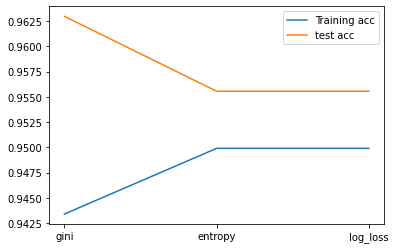

In [20]:
plt.plot(criteria, train_acc, label='Training acc')
plt.plot(criteria, test_acc, label='test acc')
plt.legend()
plt.show()

### Variation over max_depth

In [26]:
max_depth_arr = np.arange(1,10)
train_acc , test_acc = list(), list()

for ind,i in enumerate(max_depth_arr):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    train_acc.append(acc)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_acc.append(acc)
    
# print(train_acc)
# print(test_acc)

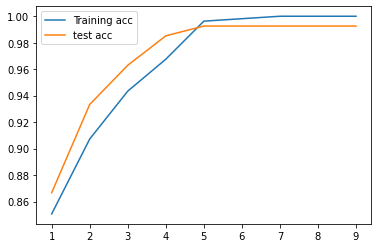

In [27]:
plt.plot(max_depth_arr, train_acc, label='Training acc')
plt.plot(max_depth_arr, test_acc, label='test acc')
plt.legend()
plt.show()

### Variation over min_samples_split

In [28]:
min_samples_split_arr = np.arange(2,25)
train_acc , test_acc = list(), list()

for i in min_samples_split_arr:
    clf = DecisionTreeClassifier(min_samples_split=i)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    train_acc.append(acc)
    
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_acc.append(acc)
    
# print(train_acc)
# print(test_acc)

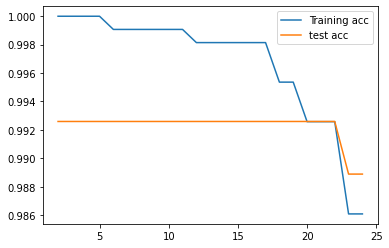

In [29]:
plt.plot(min_samples_split_arr, train_acc, label='Training acc')
plt.plot(min_samples_split_arr, test_acc, label='test acc')
plt.legend()
plt.show()

## 3.

### Plotting the tree

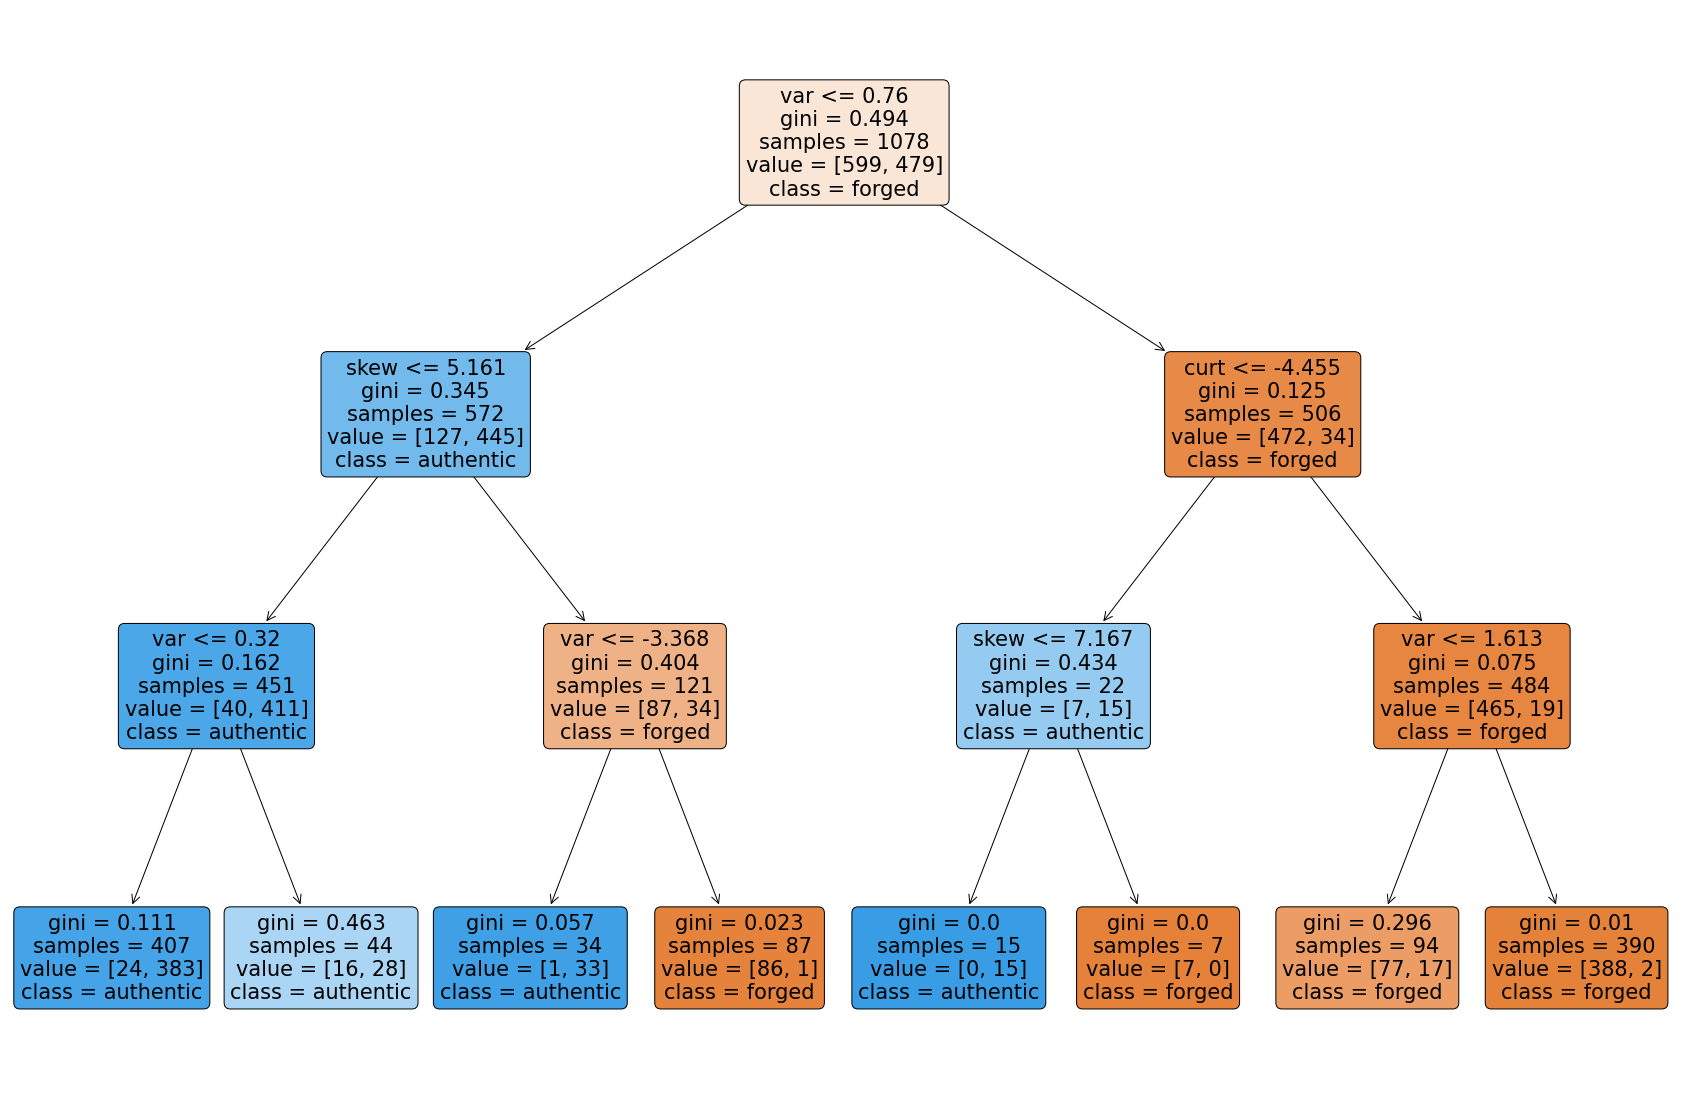

In [64]:
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)
plotTree(clf)

### Denouement

Use this place to report all comparisons and wrap up the calls to the functions written above.

#### Variation over criterion
Gini index performs the best. On the other hand, both log_loss and entropy show the same performance, which is also to be expected as they are the same function for binary classes

#### Variation over max depth
Initially, both test and train accuracy increase with the increase in depth. After around, depth=5 the training accuracy becomes 1, and the test accuracy also starts to become static. However, it is quite obvious that our model has overfitted at this stage and there is a risk of it performing badly on some new data. There depth=3 or 4 is the ideal/optimal value for our tree.

#### Variation over min_samples_split
Training accuracy continuously decreases as the min_samples_split increase. For test accuracy, it remains constant for the most part and then suddenly shoots down. Hence min_samples_split=2 can be said to be optimal.